In [7]:
# Simple string assignment
file_path <- "../Datasets/cw_r.xlsx"

# Install and load necessary packages (if not already installed)
if (!require(readxl)) install.packages("readxl")
if (!require(dplyr)) install.packages("dplyr")
# Load ggplot2
if (!require(ggplot2)) install.packages("ggplot2")
# Load libraries
if (!require(stringr)) install.packages("stringr")
library(readxl)
library(dplyr)
library(ggplot2)
library(stringr)

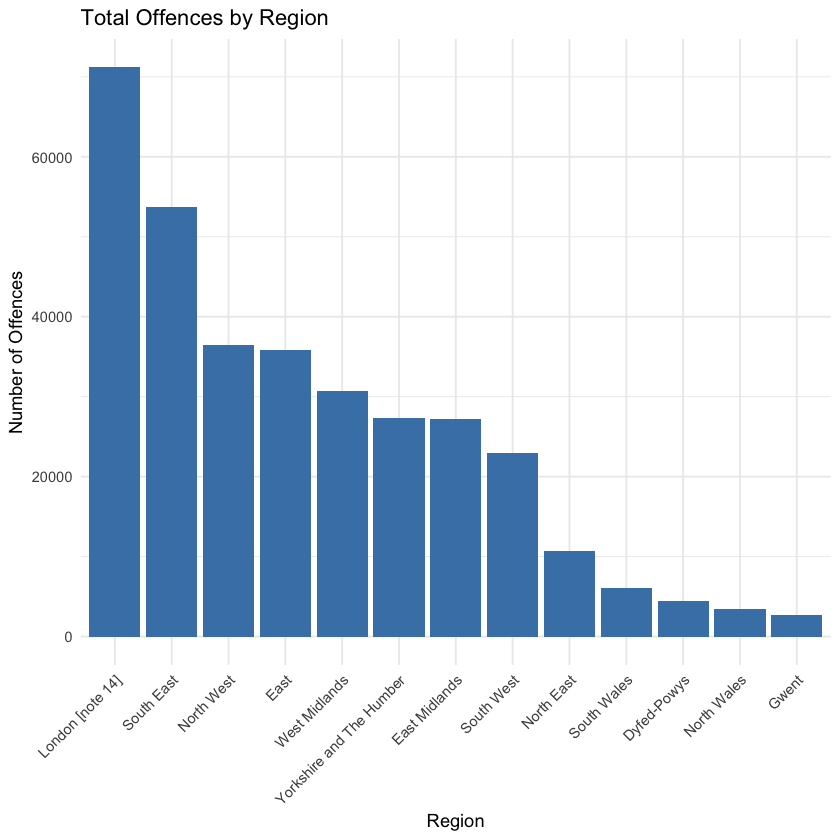

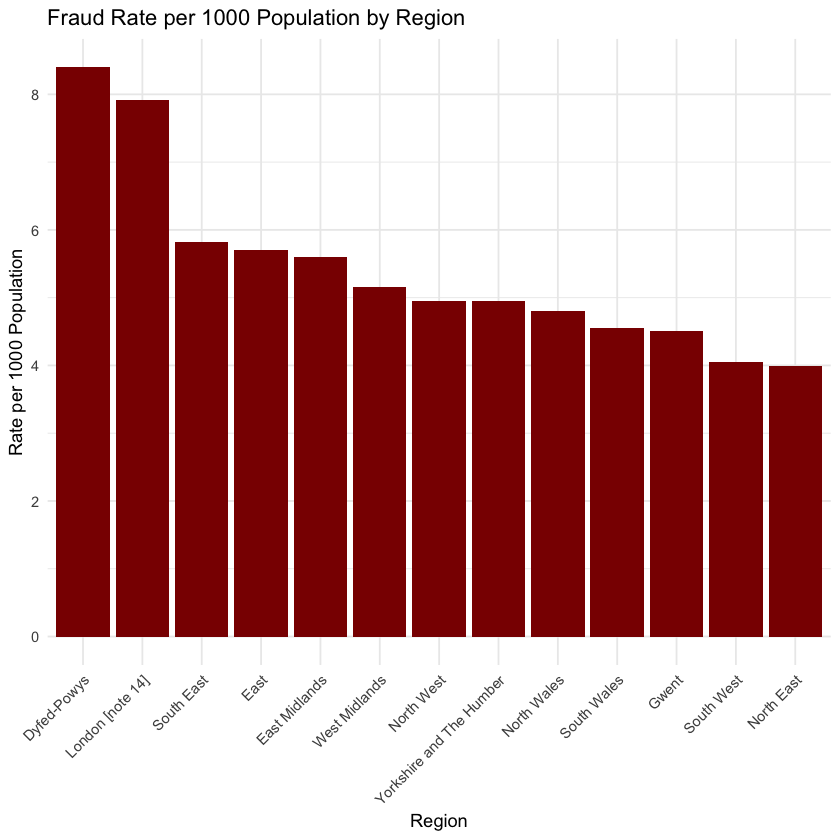

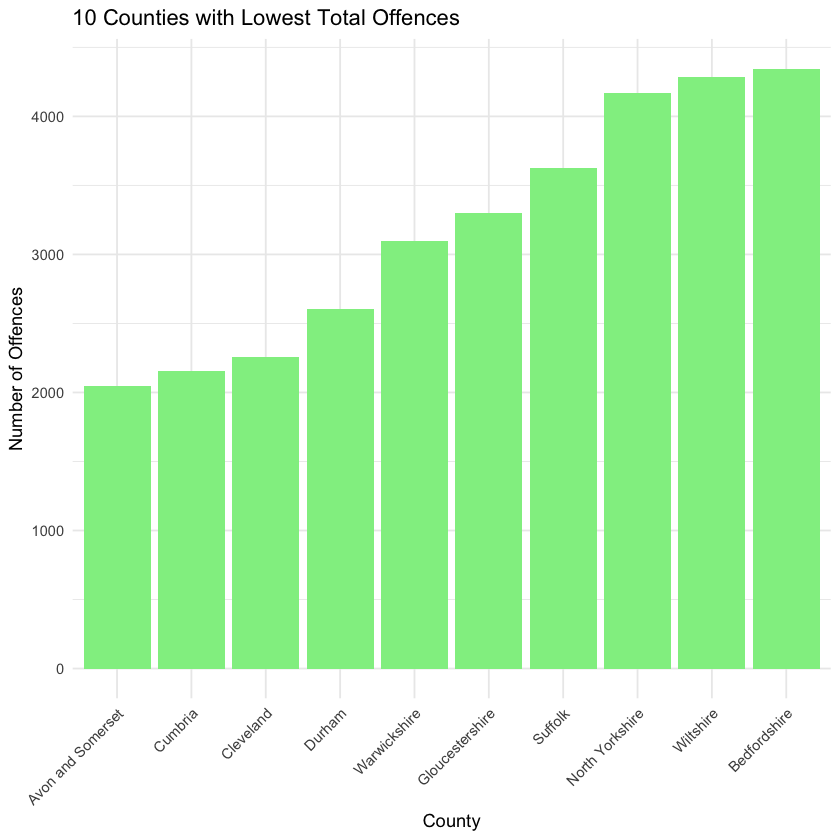

In [ ]:
# Load Table 5
table5_data <- read_excel(file_path, sheet = "Table 5", skip = 9, range = "A10:E66")  # nolint

# Rename columns for clarity
table5_df <- table5_data %>%
  rename(
    Area_Code = `Area Code`,
    Area_Name = `Area Name`,
    Offences = `Number of offences`,
    Rate = `Rate per 1,000 population`,
    Change = `% change from\r\n previous year`
  ) %>%
  filter(!Rate %in% c("[z]", "[u1]")) %>%  # Filter first
  mutate(Rate = as.numeric(Rate))         # Then convert to numeric

# Separate regions and counties
regions_df <- table5_df %>%
  filter(str_detect(Area_Code, "^E12|^W15")) %>%
  arrange(desc(Offences))

counties_df <- table5_df %>%
  filter(str_detect(Area_Code, "^E23|^W23")) %>%
  arrange(Offences)

# Plot regions by offences and rate
p1 <- ggplot(regions_df, aes(x = reorder(Area_Name, -Offences), y = Offences)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Total Offences by Region",
       x = "Region",
       y = "Number of Offences")

p2 <- ggplot(regions_df, aes(x = reorder(Area_Name, -Rate), y = Rate)) +
  geom_bar(stat = "identity", fill = "darkred") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Fraud Rate per 1000 Population by Region",
       x = "Region",
       y = "Rate per 1000 Population")

# Plot lowest offence counties
p3 <- counties_df %>%
  head(10) %>%
  ggplot(aes(x = reorder(Area_Name, Offences), y = Offences)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "10 Counties with Lowest Total Offences",
       x = "County",
       y = "Number of Offences")

print(p1)
print(p2)
print(p3)